## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Calculate the Jaccard and Rand Index Functions

In [2]:
def jaccard_rand(predicted, ground):
    length = len(predicted) 
    predicted_matrix = np.zeros((length, length))
    ground_matrix = np.zeros((length, length))
    
    ## Ground truth and Predicted matrix
    for i in range(length):
        for j in range(length):
            if predicted[i]==predicted[j]:
                predicted_matrix[i][j]=1
            if ground[i]==ground[j]:
                ground_matrix[i][j] = 1
                
    ## Calculating the agree and disagree value for jaccard and rand
            
    m00,m01,m10,m11 = 0,0,0,0
    for i in range(length):
        for j in range(length):
            if predicted_matrix[i][j]+ground_matrix[i][j]==2:
                m11 +=1
            elif predicted_matrix[i][j]+ground_matrix[i][j]==0:
                m00 +=1
            elif predicted_matrix[i][j]==0 and ground_matrix[i][j]==1:
                m01 +=1
            elif predicted_matrix[i][j]==1 and ground_matrix[i][j]==0:
                m10 +=1
                
    ## Calculating jaccard and rand index
    jaccard = float(m11)/(m11 + m10 + m01)
    rand = float(m11 + m00) / (m11 + m10 + m01 + m00)

    return jaccard, rand


## Plot the Principal components Functions

In [3]:
def plot_pca(predicted_clusters,X):
    pca = PCA(n_components=2)
    pca.fit(X)
    x_pca = pca.transform(X)
    pca_x = pd.DataFrame(x_pca,columns=['pc_1','pc_2'])
    pca_x['clusters'] = predicted_clusters
    sns.set_style('darkgrid')
    sns.lmplot(x = 'pc_1',y='pc_2',data = pca_x,hue='clusters',fit_reg=False,size=7,aspect=1)
    plt.title('K Means Clustering')
    plt.show()
    

## Input code

In [4]:
x = pd.read_csv('new_dataset_1.txt', sep='\t', header=None)
gene = list(x[0].values)
ground_truth = list(x[1].values)
data = x.drop([0,1],axis=1)
Y = data.values
data = pd.DataFrame(data)
rows,columns = data.shape
k = 3
iterations = 0

## Selecting initial Centroids 

In [5]:
np.random.seed(101)
#cents = sorted(np.random.randint(0,rows,size=k))
cents = [3,5,9]
print(cents)
centroid = [data.iloc[cent].values for cent in cents]


[3, 5, 9]


## Cluster assignments

In [6]:

for i in range(len(centroid)):
    data['cent'+str(i+1)] = data.iloc[:,:columns].apply(lambda x:distance.euclidean(x.values,centroid[i]),axis=1)

data['cluster'] = data.iloc[:,columns:(columns+k)].apply(lambda x : int(x.argmin()[4:]),axis = 1)

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """


## K means Algorithm

In [7]:

while True:
    new_centroids = []
    for i in range(k):
        #print(len(data[data['cluster']==i+1]))
        if len(data[data['cluster']==i+1]) == 0:
            new_centroids.append(centroid[i])
        else:
            new_centroids.append(data[data['cluster']==i+1].iloc[:,:columns].mean(axis=0).values)

    for i in range(len(centroid)):
        data['cent'+str(i+1)] = data.iloc[:,:columns].apply(lambda x:distance.euclidean(x.values,new_centroids[i]),axis=1)
    new_cluster = data.iloc[:,columns:(columns+k)].apply(lambda x : int(x.argmin()[4:]),axis = 1).values
    check_value = sum(data['cluster'].values == new_cluster)
    y_pre1 = (data['cluster'].values)
    iterations +=1
    if check_value != rows and iterations < 10:
            data['cluster'] = new_cluster
    else:
        break

C:\Users\sachin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]


## Calculating Jaccard coefficient

In [8]:
## Calculating Jaccard and Rand Index 
predicted_clusters = list(data['cluster'].values)
jaccard , rand = jaccard_rand(predicted_clusters,ground_truth)
print('\n')
print('Jaccard value :'+ str(jaccard))
print('Rand Index value :'+ str(rand))



Jaccard value :0.4838499184339315
Rand Index value :0.7187555555555556


## Plotting using pca

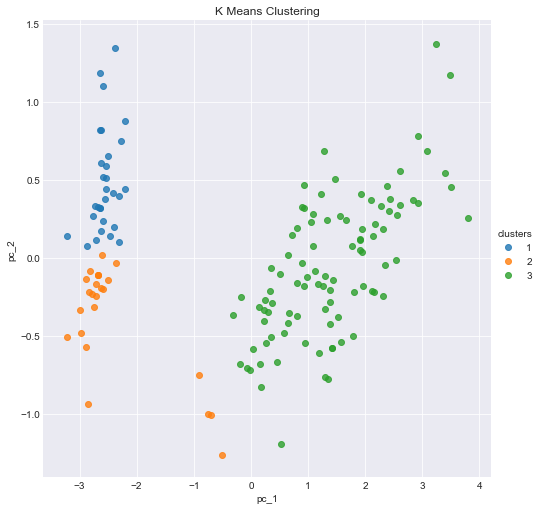

In [9]:
## Plotting the Principal components
plot_pca(predicted_clusters,Y)
